<a href="https://colab.research.google.com/github/cristiana-e/NLP_Licitacoes_RS/blob/master/Item_NLP_21_large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das licitações de itens no Rio Grande do Sul em 2021

Desafio: propõe-se a análise de uma base com as licitações dos órgãos públicos do Rio Grande do Sul

Este estudo foi realizado utilizando a seguinte metodologia:

- Tratamento dos dados: tratamento dos dados, tais como exclusão de "stop words", exclusão de pontuação, tokenização, etc;
- Codificação: uso de técnicas para codificar o texto tokenizado;
- Modelagem: uso de modelos para agrupar os objetos das licitações em conjuntos comuns;
- Análise exploratória dos dados.

# Instalando as dependências necessárias

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy

     |████████████████████████████████| 2.1 MB 12.9 MB/s 
     |████████████████████████████████| 1.1 MB 59.7 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.0/452.0 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.2/628.2 KB 26.1 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installa

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 31.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


# Importando os bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

import spacy
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re

from tqdm import tqdm
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nlp = spacy.load('pt_core_news_sm') #carregamento do core em PT

In [ ]:
nltk.download('stopwords') #download das stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese') #carregando as stopwords em pt

#Primeira visualizaçao do dataset

**Explorando os dados do arquivo de Licitações de ITENS de 2021.**

In [ ]:
#importando e lendo o arquivo
item = pd.read_csv('/content/drive/MyDrive/IBM/Data Science/BTP/Datasets/Lic_RS/i_2021.csv')

#exibindo as primeiras entradas dos dados
item.head()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_ESTIMADO,VL_TOTAL_ESTIMADO,DT_REF_VALOR_ESTIMADO,PC_BDI_ESTIMADO,PC_ENCARGOS_SOCIAIS_ESTIMADO,CD_FONTE_REFERENCIA,DS_FONTE_REFERENCIA,TP_RESULTADO_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,PC_BDI_HOMOLOGADO,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COVID19
0,44500,274.0,2021,CPC,1,1,1,Credenciamento de academias de ginástica e mus...,1.0,UN,50.00,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,56900,25.0,2021,TMP,1,1,1.1,PLACA DE OBRA (PARA CONSTRUCAO CIVIL) EM CHAPA...,6.0,M2,272.49,1634.94,2021-06-18,21.11,111.1,00004813,SINAPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,56900,25.0,2021,TMP,1,2,1.2,TAPUME COM COMPENSADO DE MADEIRA. AF_05/2018,71.0,M2,128.69,9136.99,2021-06-18,21.11,111.1,98458,SINAPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,56900,25.0,2021,TMP,1,3,1.3,PODA EM ALTURA DE ÁRVORE COM DIÂMETRO DE TRONC...,2.0,UN,271.62,543.24,2021-06-18,21.11,111.1,98533,SINAPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,56900,25.0,2021,TMP,1,4,1.4,"LOCACAO DE CONTAINER 2,30 X 6,00 M, ALT. 2,5...",6.0,MES,539.31,3235.86,2021-06-18,21.11,111.1,00010776,SINAPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
#Vizualizando o formato do dataset
item.shape

(972247, 33)

In [ ]:
#Listando o nome das colunas do dataset
list(item.columns.values)

['CD_ORGAO',
 'NR_LICITACAO',
 'ANO_LICITACAO',
 'CD_TIPO_MODALIDADE',
 'NR_LOTE',
 'NR_ITEM',
 'NR_ITEM_ORIGINAL',
 'DS_ITEM',
 'QT_ITENS',
 'SG_UNIDADE_MEDIDA',
 'VL_UNITARIO_ESTIMADO',
 'VL_TOTAL_ESTIMADO',
 'DT_REF_VALOR_ESTIMADO',
 'PC_BDI_ESTIMADO',
 'PC_ENCARGOS_SOCIAIS_ESTIMADO',
 'CD_FONTE_REFERENCIA',
 'DS_FONTE_REFERENCIA',
 'TP_RESULTADO_ITEM',
 'VL_UNITARIO_HOMOLOGADO',
 'VL_TOTAL_HOMOLOGADO',
 'PC_BDI_HOMOLOGADO',
 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO',
 'TP_ORCAMENTO',
 'CD_TIPO_FAMILIA',
 'CD_TIPO_SUBFAMILIA',
 'TP_DOCUMENTO',
 'NR_DOCUMENTO',
 'TP_DOCUMENTO.1',
 'NR_DOCUMENTO.1',
 'TP_BENEFICIO_MICRO_EPP',
 'PC_TX_ESTIMADA',
 'PC_TX_HOMOLOGADA',
 'BL_COVID19']

In [ ]:
#exibindo os valores ausentes cara cada coluna (as colunas com maior número de valores ausentes ficam localizalas no topo da lista)
(item.isnull().sum()).sort_values(ascending=False)

PC_TX_ESTIMADA                    972169
PC_TX_HOMOLOGADA                  972164
CD_TIPO_SUBFAMILIA                960009
CD_TIPO_FAMILIA                   956619
TP_ORCAMENTO                      877994
NR_DOCUMENTO.1                    853515
TP_DOCUMENTO.1                    853515
CD_FONTE_REFERENCIA               816130
DS_FONTE_REFERENCIA               783530
DT_REF_VALOR_ESTIMADO             680399
PC_ENCARGOS_SOCIAIS_HOMOLOGADO    675433
PC_BDI_HOMOLOGADO                 674786
PC_BDI_ESTIMADO                   668165
PC_ENCARGOS_SOCIAIS_ESTIMADO      665835
TP_DOCUMENTO                      480154
NR_DOCUMENTO                      480154
TP_RESULTADO_ITEM                 413098
TP_BENEFICIO_MICRO_EPP            341228
VL_UNITARIO_HOMOLOGADO            295480
VL_TOTAL_HOMOLOGADO               295480
VL_UNITARIO_ESTIMADO               39446
VL_TOTAL_ESTIMADO                  39446
DS_ITEM                                1
CD_ORGAO                               0
NR_LICITACAO    

## Removendo dados nulos

Agora que temos uma ideia de como são os dados no dataset, iremos remover as entradas vazias de forma que as informações dos dados fiquem mais limpas e removemos conteúdos desnecessários para nossa análise.
Das colunas vazias, manteremos algumas para finalizar nossas conclusões.

In [ ]:
#Removendo colunas com valores inexistentes, exceto 'VL_LICITACAO', 'VL_HOMOLOGADO' e 'DT_HOMOLOGACAO'
drop = item.isna().any()
cols_to_ignore = ['VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'DT_REF_VALOR_ESTIMADO', 'DS_ITEM']
drop[cols_to_ignore] = False

item = item.loc[:, ~drop]

In [ ]:
(item.isnull().sum()).sort_values(ascending=False)

DT_REF_VALOR_ESTIMADO     680399
VL_UNITARIO_HOMOLOGADO    295480
VL_TOTAL_HOMOLOGADO       295480
DS_ITEM                        1
CD_ORGAO                       0
NR_LICITACAO                   0
ANO_LICITACAO                  0
CD_TIPO_MODALIDADE             0
NR_LOTE                        0
NR_ITEM                        0
NR_ITEM_ORIGINAL               0
QT_ITENS                       0
SG_UNIDADE_MEDIDA              0
BL_COVID19                     0
dtype: int64

In [ ]:
#Conferindo o impacto das mudanças no dataset
item.shape

(972247, 14)

In [ ]:
#Removendo a linha nula que ainda não foi resolvida na coluna dos itens
item.dropna(subset=['DS_ITEM'], inplace=True)

In [ ]:
item.shape

(972246, 14)

In [ ]:
#Explorando as entradas da descrição dos objetos
item['DS_ITEM'].head(30)

0     Credenciamento de academias de ginástica e mus...
1     PLACA DE OBRA (PARA CONSTRUCAO CIVIL) EM CHAPA...
2          TAPUME COM COMPENSADO DE MADEIRA. AF_05/2018
3     PODA EM ALTURA DE ÁRVORE COM DIÂMETRO DE TRONC...
4     LOCACAO DE CONTAINER 2,30  X  6,00 M, ALT. 2,5...
5     LOCACAO CONVENCIONAL DE OBRA, UTILIZANDO GABAR...
6     RECOMPOSIÇÃO PARCIAL DE ARAME FARPADO Nº 14 CL...
7     LIMPEZA MECANIZADA DE CAMADA VEGETAL, VEGETAÇÃ...
8                                       ARQUITETO PLENO
9                            ENCARREGADO GERAL DE OBRAS
10    DEMOLIÇÃO DE ALVENARIA DE BLOCO FURADO, DE FOR...
11    REMOÇÃO DE LOUÇAS, DE FORMA MANUAL, SEM REAPRO...
12    ESCAVAÇÃO MANUAL DE VALA COM PROFUNDIDADE MENO...
13    PREPARO DE FUNDO DE VALA COM LARGURA MENOR QUE...
14    FABRICAÇÃO, MONTAGEM E DESMONTAGEM DE FÔRMA PA...
15    LASTRO DE CONCRETO MAGRO, APLICADO EM BLOCOS D...
16    ARMAÇÃO DE BLOCO, VIGA BALDRAME OU SAPATA UTIL...
17    CONCRETAGEM DE SAPATAS, FCK 30 MPA, COM US

## Tratando os dados

Depois de uma exploração inicial dos nossos dados, podemos elaborar um plano para tratá-los, de forma que possam ser melhor aproveitados.
Como podemos ver acima, há alguns caracteres que não possuem relevância para este estudo e que podem ser excluídos. Além disso, seguiremos com os seguintes passos:
- Padronização de palavras em caixa baixa.
- Remoção de caractecres especiais, dígitos, stopwords e espaçamentos desnecessários.
- Tokenização dos dados.

Após o tratamento, os dados serão salvos em uma nova coluna no dataset.

In [ ]:
# Carregamento das stopwords
stopwords = nltk.corpus.stopwords.words('portuguese') 

In [ ]:
#Criando um filtro para alguns caracteres especiais encontrados junto das stopwords
filter_words = stopwords + ['kg', 'g','mg', 'km', 'm', 'cm', 'mm', 'ml', 'm²', 'm³', 'cm²','cm³', '-', '+', '=', 'mcg', 'nº', 'ª', 'º', 'un', 'aquisição', 'registro', 'contratação', 'solicitação', 'serviço', 'prestação', 'empresa', 'locação', 'licitação', 'empresas', 'serviços', 'kit', 'kits']

### Expressões regulares e Tokenização

Expressões regulares (ou regex) são mecanismos de buscas por padrões em texto. Utilizaremos desta ferramenta para encontrar os caracteres que resejamos remover. 

Em seguida. iniciaremos o processo de tokeninzação, que é a primeira fase no processamento de um texto, quebrando os componentes das frases em tokens. Esses tokens podem ser consultados futuramente dentro de  um objeto doc que conterá os dados de nossa análise.

In [ ]:
# Criando a função de tratamento dos dados
def clean_data_tokenization(sentence):
    sentence = sentence.lower() # conversão para caixa baixa
    sentence = re.sub(r"[^\w\s]", "",sentence) # Removendo caracteres especiais
    sentence = re.sub("[0-9]+","", sentence) # Removendo dígitos
    sentence = re.sub("/+","", sentence) # Removendo "/"
    sentence = re.sub(' +', ' ', sentence) # Removendo espaçamentos repetitivos
    
    doc=nlp(sentence) # Tokenização

    tokens=[token.text for token in doc]
    tokens=[token for token in tokens if token not in filter_words] # Removendo caracteres e palavras salvos em filter_words

    return tokens

In [ ]:
# Aplicação do tratamento na lista de licitações
item['DS_ITEM_TRATADO'] = item['DS_ITEM'].apply(lambda DS_ITEM: clean_data_tokenization(DS_ITEM))
item.to_csv('/content/drive/MyDrive/IBM/Data Science/BTP/Datasets/Lic_RS/2021_TRATADO_ITENS_LARGE_2.csv') #salvando un novo arquivo csv com os dados tratado

(251498, 63)
(239889, 21)

In [ ]:
#Observando os resultados da tokenização
item['DS_ITEM_TRATADO'].head()

0    [credenciamento, academias, ginástica, muscula...
1    [placa, obra, construcao, civil, chapa, galvan...
2                 [tapume, compensado, madeira, af, _]
3    [poda, altura, árvore, diâmetro, tronco, maior...
4    [locacao, container, x, alt, escritorio, divis...
Name: DS_ITEM_TRATADO, dtype: object

## Trabalhando o Modelo

Finalmente chegamos em uma das partes mais. trabalhosas de um projeto de aprendizado não supervisionado.
Esta parte me consumiu horas para encontrar os parâmetros ideais para o treinamento do modelo. O processo de tokenização foi repetido inúmeras vezes conforme fosse identificado palavras que inteferiam no processo e não possuiam valor para a clusterização.

## Mineração dos textos - TFIDF e K-Means
Neste projeto, utilizaremos um cálculo estatístico chamado **TFIDF**, que irá medir quais termos são mais relevantes para um tópico. Ele faz isso através de uma análise da frequência em que um termo aparece no registro  em comparação à sua frequência em em todo o documento.

In [ ]:
def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(max_df=0.8, min_df=30, lowercase=False, tokenizer=identity_tokenizer)
tfidf = vectorizer.fit_transform(item['DS_ITEM_TRATADO'])

In [ ]:
item = pd.read_csv('/content/drive/MyDrive/IBM/Data Science/BTP/Datasets/Lic_RS/2021_TRATADO_ITENS_LARGE.csv')

In [ ]:
wcss = []
minimo=2
maximo=35
step=2

In [ ]:
for n in tqdm(range(minimo, maximo, step)):
    kmeans_model = KMeans(n_clusters=n, init='k-means++', max_iter=500, algorithm='full')
    kmeans_model.fit(tfidf)
    wcss.append(kmeans_model.inertia_)



100%|██████████| 17/17 [1:24:41<00:00, 298.94s/it]


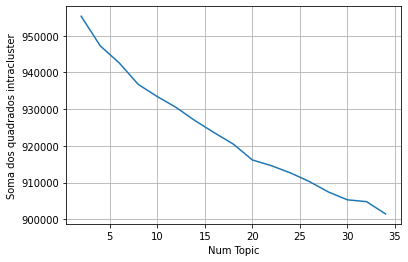

In [ ]:
# Show graph
from matplotlib.ticker import AutoMinorLocator
x = range(minimo, maximo, step)

plt.plot(x, wcss)
plt.xlabel("Num Topic")
plt.ylabel("Soma dos quadrados intracluster")
plt.grid(True)


plt.show()

Vemos pequenos traços de mudanças da linha com 4, 7, 20 e 32 clusters. Seguiremos ao modelo usando 20 como o número de separaçoes dos tópicos do documento. 4 e 7 não são suficientes e 32 pode ser demais, portanto 20 é o ideal no momento.

In [ ]:

kmeans_model = KMeans(n_clusters=20, init='k-means++', algorithm='full', max_iter=500)

X = kmeans_model.fit(tfidf)

labels = kmeans_model.labels_.tolist()


In [ ]:
item['topic'] = labels 
item.to_csv('/content/drive/MyDrive/IBM/Data Science/BTP/Datasets/Lic_RS/ITEM_2021_tfidf_20.csv')

In [ ]:
item = pd.read_csv('/content/drive/MyDrive/IBM/Data Science/BTP/Datasets/Lic_RS/ITEM_2021_tfidf_20.csv')

## Observando os Tópicos

Agora que os tópicos foram separados, iremos olhar um por um e identificar o possível nome para o grupo de itens considerados semelhantes pelo algoritmo.

In [ ]:
item[item['topic']==2][['DS_ITEM_TRATADO','topic']][0:12000]

,DS_ITEM_TRATADO,topic
1179,"['filtro', 'pressão', 'hidráulico']",2
1180,"['filtro', 'blindado', 'óleo']",2
1734,"['filtro', 'diesel']",2
1755,"['filtro', 'oleo', 'filtro', 'oleo', 'tm']",2
1756,"['filtro', 'ar', 'condicionado', 'filtro', 'ar...",2
...,...,...
945001,"['filtro', 'ar', 'ars', 'ford', 'cargo']",2
945002,"['filtro', 'ar', 'ars', 'mercedes', 'benz']",2
945003,"['filtro', 'interno', 'ar', 'ars', 'mercedes',...",2
945004,"['filtro', 'externo', 'ar', 'ars', 'mercedes',...",2


In [ ]:
#Atribuindo nomes aos grupos 
remap_clusters = {0:'Materiais Var.'
                    , 1:'Fármacos'
                    , 2:'Filtros'
                    , 3:'Alimentos'
                    , 4:'Variados'
                    , 5:'Construção civil'
                    , 6:'Variados'
                    , 7:'Leite/semelhantes'
                    , 8:'Variados'
                    , 9:'Kits variados'
                    , 10:'Mão de obra'
                    , 11:'Tintas'
                    , 12:'Transporte'
                    , 13:'Luvas'
                    , 14:'Encanamento'
                    , 15:'Alvenaria'
                    , 16:'Alimentos'
                    , 17:'Pneus'
                    , 18:'Variados'
                    , 19:'Variados'}

item['Topicos'] = item['topic'].map(remap_clusters)

In [ ]:
#Exibindo a quantidade de itens para cada grupo
item['Topicos'].value_counts()

Variados             744596
Alimentos             66267
Materiais Var.        19599
Pneus                 18924
Fármacos              18083
Encanamento           17011
Alvenaria             15828
Filtros               12583
Construção civil      11806
Tintas                10689
Mão de obra            9898
Luvas                  9145
Kits variados          7888
Transporte             5488
Leite/semelhantes      4441
Name: Topicos, dtype: int64

Os modelos certamente tiveram dificuldade em separar os tópicos devidamente. Na lista acima podemos perceber que a maior parte dos dados não foram inseridos em clusters categóricos bem definidos.
Como este projeto se trata apenas de um estudo inicial, iremos continuar a análise dos dados considerando somente os clusters categorizados devidamente.

## Analisando os grupos

Agora que temos todos os grupos com seus devidos nomes atribuídos, qual será a categoria com maior número de itens solicitados ao Governo do Estado do Rio Grande do Sul? Quais meses possuem maior número de licitações? Quais os tickets com maior valor?

A análisa a seguir irá nos dar a resposta para estas perguntas!

In [ ]:
#Formando um array com os meses do pedido dos itens
meses = item['DT_REF_VALOR_ESTIMADO'].str[5:7]
meses = meses.dropna()
meses = meses.astype(int)
meses = meses.tolist()
meses.sort()

Text(0.5, 1.0, 'Itens por Mês')

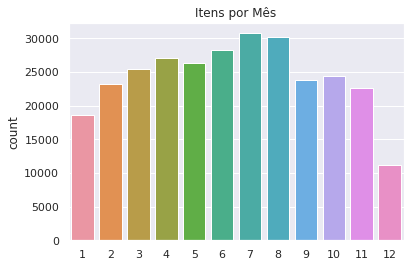

In [ ]:
#Plotando o gráfico para visualização
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=meses)
ax.set_title("Itens por Mês")

In [ ]:
item['DT_REF_VALOR_ESTIMADO'].str[5:7].value_counts()

07    30770
08    30160
06    28227
04    27054
05    26358
03    25476
10    24449
09    23754
02    23176
11    22560
01    18674
12    11189
Name: DT_REF_VALOR_ESTIMADO, dtype: int64

In [ ]:
11189*100/30770

36.363340916477085

Observando o gráfico acima, percebemos claramente que os meses com maiores números de itens licitados são julho e agosto. Dezembro, entretanto é o mês com o menor número de solicitações, **36,36% menor** que o mês de julho.

In [ ]:
group_tp = item[item.Topicos != 'Variados']
group_tp = group_tp.groupby('Topicos')
max_tp = group_tp.max().VL_UNITARIO_HOMOLOGADO
max_tp = max_tp.sort_values()

In [ ]:
print(max_tp)

Topicos
Luvas                  28000.00
Fármacos               39016.50
Pneus                  58389.22
Encanamento           110000.00
Tintas                118500.00
Materiais Var.        123305.52
Kits variados         240000.00
Leite/semelhantes     290100.00
Alimentos             653201.58
Filtros               900000.00
Transporte           1232000.00
Construção civil     1304741.32
Alvenaria            1948000.00
Mão de obra          7952550.00
Name: VL_UNITARIO_HOMOLOGADO, dtype: float64


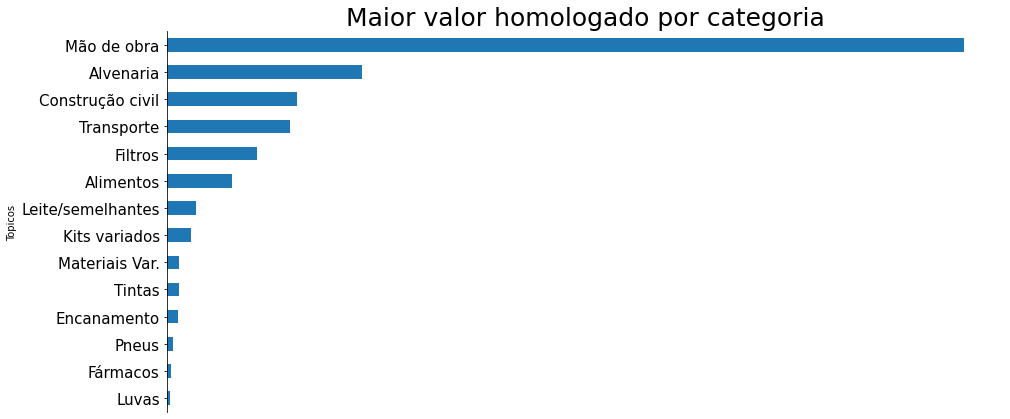

In [ ]:
#Plotando o gráfico para visualização
max_tp.plot(x='Topicos', y=max_tp, kind='barh', figsize=(15, 7), fontsize=15 )
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
ax.set_facecolor('None')
plt.grid(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Maior valor homologado por categoria', fontsize=25)
plt.show()

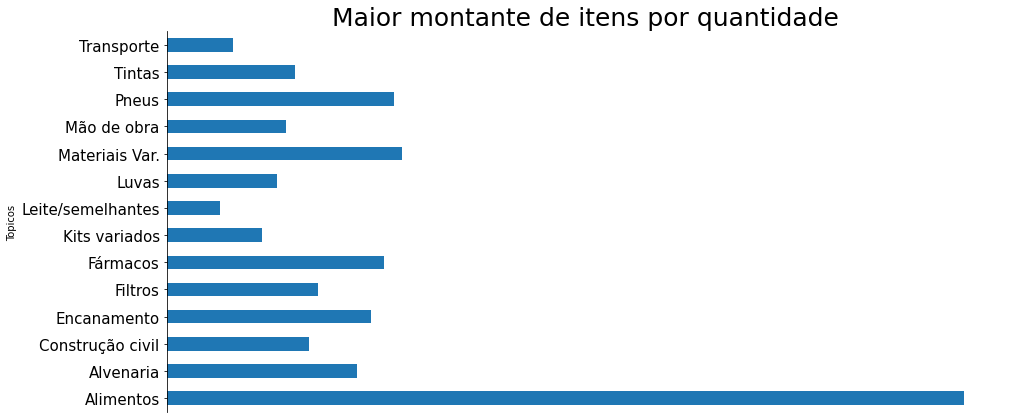

In [ ]:
n_item = item[item['Topicos']!='Variados']

ax = n_item.groupby('Topicos').size().plot(kind='barh', figsize=[15,7], fontsize=15 )
ax.axes.get_xaxis().set_visible(False)


plt.grid(False)

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Maior montante de itens por quantidade', fontsize=25)
plt.show()

Licitações para **serviços de mão de obra** apresentam maior valor de homologação nos itens analisados nesta etapa do projeto, o maior número de itens levando em consideração a quantidade, entretanto, pertence a categoria de **Alimentos**.

#Conclusões

Este projeto não apresentou bons resultados quannto a classificação dos items em categorias bem definifas. Seria necessário maiores testes de parâmetros e algoritmos ou, ainda, trabalhar mais intensamente na clusterização dos grupos que não foram bem distribuídos.


Vimos também que há uma clara diferença de categoria entre o maior valor de ticket homologado, que foi atribuído às despesas com mão de obra, e o montante de itens por quantidade, que pertence à categoria de Alimentos.

Esse tipo de análise é importante pois pode ser adaptada para diversas necessidades, como identificar quais itens possuem maior necessidade de compra, quanto está sendo investido em cada área, e até mesmo quais órgãos ou regiões do estado estão recebendo mais, ou menos, recursos. É uma ótima ferramente para compreender como o dinheiro do Estado está sendo distribuído!